# HomeRun Analysis
## For the start of the 2017 season
### MSP 04.03.2017

This is a jupyter notebook that examines the home run production of individuals during the 2016 season, with a goal of projecting the home run production forward.

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# now read in all the data: it's a lot, but is set up this way so that
#  we can slice across batting order.


# all with > 100 PA at given lineup position

Total2016 = np.loadtxt('2016Batting/TotalBatting.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')



First2016 = np.loadtxt('2016Batting/BattingFirst.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')

Second2016 = np.loadtxt('2016Batting/BattingSecond.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')

Third2016 = np.loadtxt('2016Batting/BattingThird.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')

Fourth2016 = np.loadtxt('2016Batting/BattingFourth.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')

Fifth2016 = np.loadtxt('2016Batting/BattingFifth.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')

Sixth2016 = np.loadtxt('2016Batting/BattingSixth.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')

Seventh2016 = np.loadtxt('2016Batting/BattingSeventh.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')

Eighth2016 = np.loadtxt('2016Batting/BattingEighth.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')

Ninth2016 = np.loadtxt('2016Batting/BattingNinth.csv',\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skiprows=1,delimiter=',')



As a first plot, let's look at the production curve for home runs (that is, what does the distribution function of home runs look like in the MLB?).

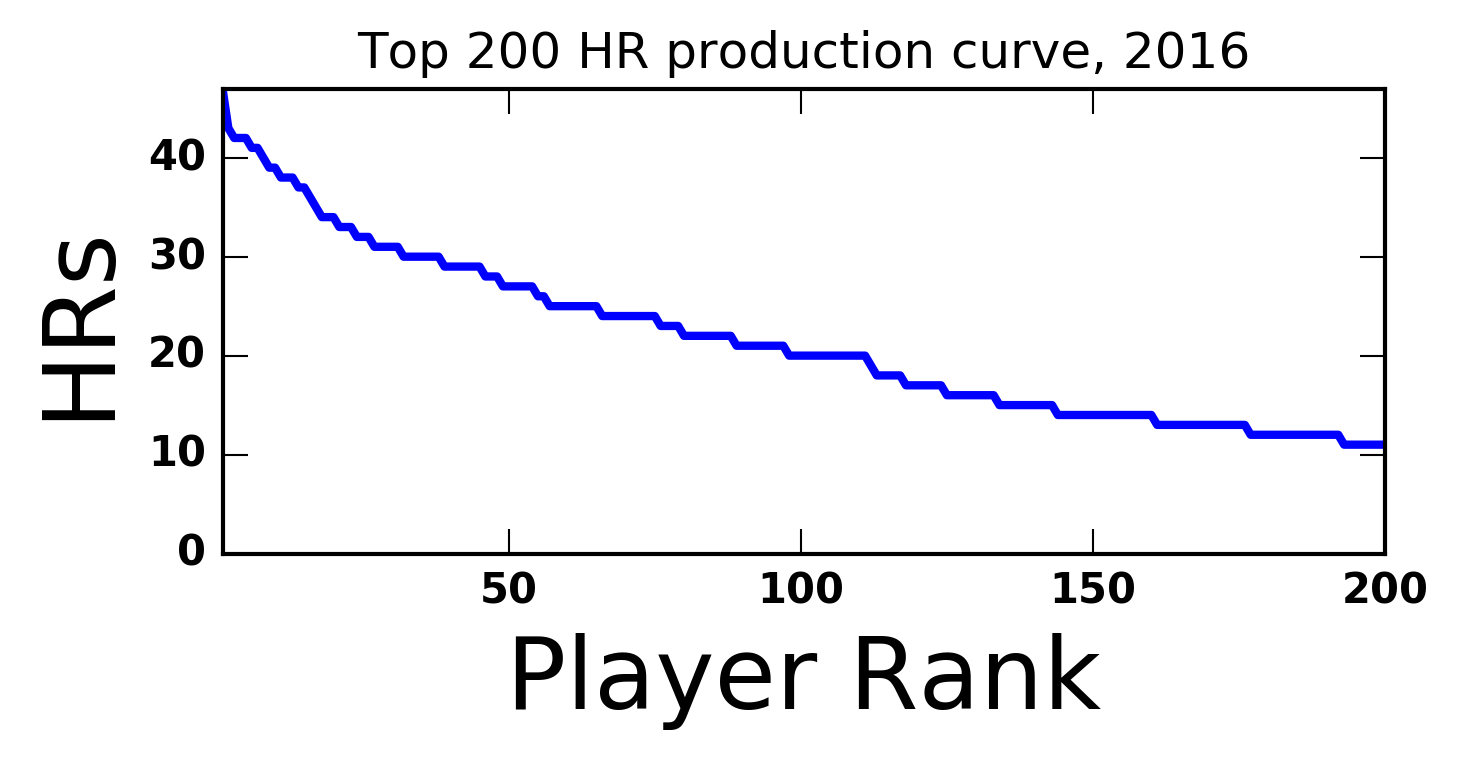

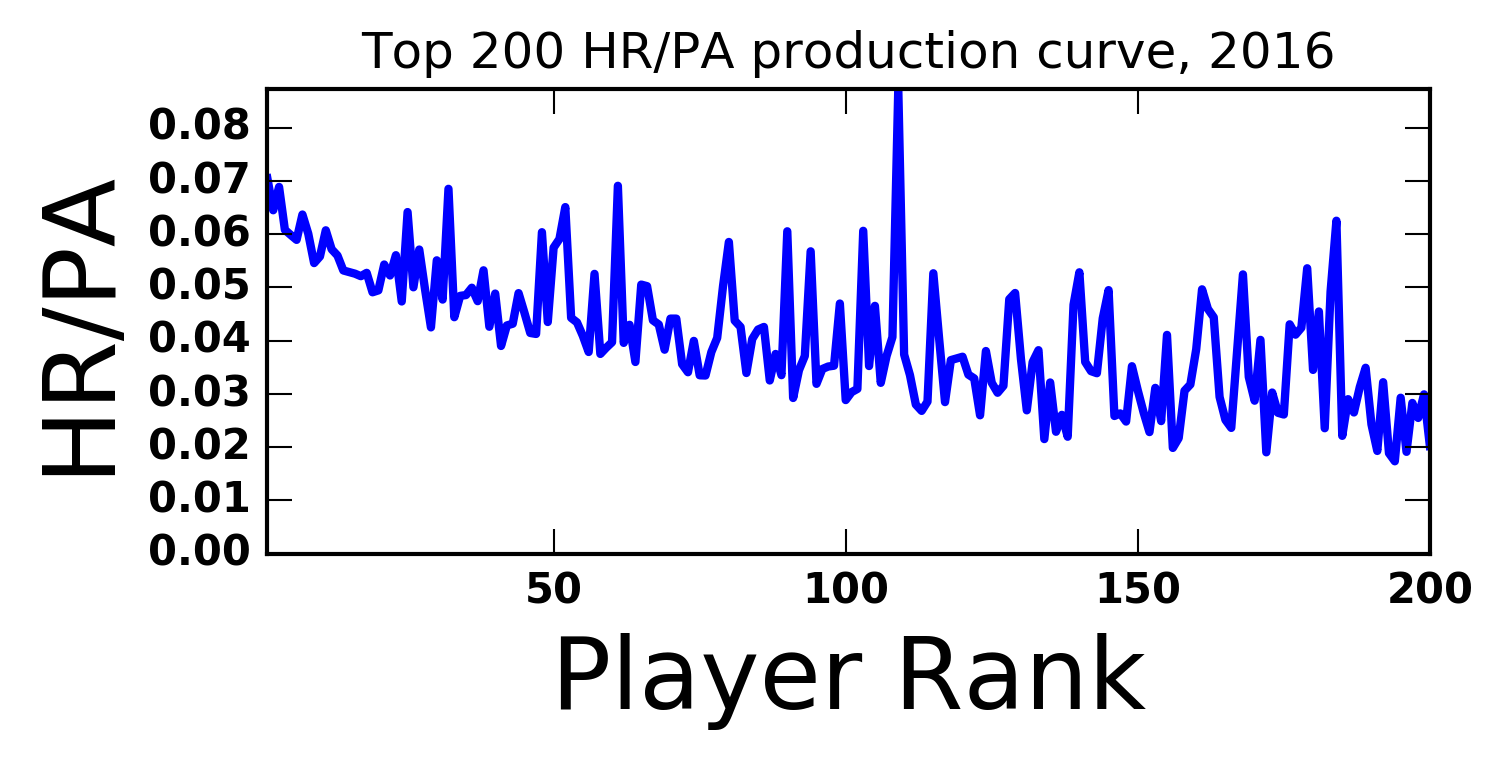

In [6]:
hrs = Total2016['HR']
pas = Total2016['PA']
names = Total2016['Name']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,hrs.size,hrs.size),hrs[(-1.*hrs).argsort()])
plt.xlabel('Player Rank',size=24)
plt.ylabel('HRs',size=24)
plt.title('Top 200 HR production curve, 2016')
_ = plt.axis([1.,200.,np.min(hrs),np.max(hrs)])

# of the top 200, what does the distribution of hrs/pas look like?
top_x_players = 200
top_hrs     = hrs[(-1.*hrs).argsort()][0:top_x_players]
top_hrs_pas = pas[(-1.*hrs).argsort()][0:top_x_players]
top_hrs_names = names[(-1.*hrs).argsort()][0:top_x_players]

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,top_hrs.size,top_hrs.size),top_hrs/top_hrs_pas)
plt.xlabel('Player Rank',size=24)
plt.ylabel('HR/PA',size=24)
plt.title('Top 200 HR/PA production curve, 2016')


_ = plt.axis([1.,200.,np.min(hrs/pas),np.max(hrs/pas)])



#### What to notice? 

Right off the bat (no pun intended), we added a second plot for complexity. What that plot does is show for the top 200 home run producers what their average hr/pa was over the season. The distribution roughly tracks with the home run production, apart from one very conspicuous outlier. Who is that?

In [8]:
x = np.where( (top_hrs/top_hrs_pas) == np.max(top_hrs/top_hrs_pas))[0]
print ('With {} HR/PA, {} comes in first.'.format(np.max(top_hrs/top_hrs_pas),top_hrs_names[x][0]))

With 0.0873362421989 HR/PA, Gary Sanchez comes in first.


It's Gary Sanchez! Based on the rest of the curve values, it's pretty easy to say that Sanchez hit HRs at an unsustainable pace.